## W poniższym okienku proszę wpisać swoje **imię, nazwisko i numer grupy**.

*   Imię: Wojciech
*   Nazwisko: Siemiątkowski
*   Grupa: 12c

## **Wstęp**

Mamy równanie różniczkowe pierwszego stopnia postaci:

$y'(t) = f(y,t)$

$y(0) = y_0$.

Aby je rozwiązać należy znaleźć funkcję $y(t)$, która by powyższe równianie spełniała, to znaczy w $t=0$ miała by wartość $y_0$, a pochodna $y$ w czasie $t$, czyli $y'(t)$, dana by była funkcją $f(y,t)$.

Numerycznie rozwiązać takie równanie różniczkowe można metodami iteracyjnymi. Tak uzyskane rozwiązania będziemy oznaczac $y_n$, gdzie $n$ oznacza krok iteracji.

Na zajęciach rozważać będziemy dwie metody:

- [metodę Eulera](https://pl.wikipedia.org/wiki/Metoda_Eulera):

$ y_{n+1} = y_n + h f(y_n,t_n)$,

- oraz metodę [midpoint](https://en.wikipedia.org/wiki/Midpoint_method):

$ y_{n+1} = y_n + h f\left(y_n + \frac{h}{2} f(y_n,t_n), t_n + \frac{h}{2}\right)$.



 # **Zadanie 1** 
 Uzupełnij poniższą funkcję $odeEuler$, tak by poprawnie wykonywała ona kolejne kroki metody Eulera rozwiązywania równań różniczkowych pierwszego stopnia.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def odeEuler(f,y0,t):
    '''
    f : funkcja, prawa strona rozwiązywanego równania różniczkowego: f(y,t)
    y0 : liczba, wartość początkowa y
    t : jednowymiarowa tablica numpy
    '''
    y = np.zeros(len(t))
    y[0] = y0
    for n in range(0,len(t)-1):
        y[n+1] = y[n] + (t[n+1] - t[n]) * f(y[n], t[n])
    return y

 # **Zadanie 2** 
 
  $y'(t) = y(t)$, 
  
  $y(0) = 1$

 
a) Rozwiąż powyższe równanie wykorzystując metodę Eulera. 

b) Porównaj uzyskane rozwiązanie z krzywą $e^t$.

c) Narysuj wykresy dla wektorów $t$ o różnej długości.


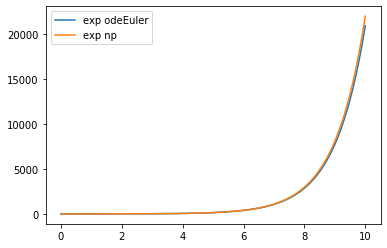

In [2]:
# Zdefiniuj przedział czasowy na którym będziemy szukali rozwiązania:

a = 0
b = 10

# Ile kroków zrobimy w tym przedziale?
n = 1000

# Stworz tablice kroków czasowych t:
t = np.linspace(a, b, n)

# Podaj wartość w punkcie początkowym:
y0 = 1

# Zdefiniuj funkcję f(y,t)
def f(y,t):
  return y

# Znajdź rozwiązanie:
sol = odeEuler(f, y0, t)

# Narysuj uzyskane rozwiązanie w funkcji czasu t
plt.plot(t , sol, label = 'exp odeEuler')

# Narysuj na tym samym przedziale czasowym funkcję e^t
plt.plot(t , np.exp(t), label = 'exp np')

plt.legend()
plt.show()

 # **Zadanie 3** 
 Uzupełnij poniższą funkcję $odeMidPoint$, tak by poprawnie wykonywała ona kolejne kroki metody Mid Point.

In [3]:
def odeMidPoint(f,y0,t):
    '''
    f : funkcja, prawa strona rozwiązywanego równania różniczkowego: f(y,t)
    y0 : liczba, wartość początkowa y
    t : jednowymiarowa tablica numpy taka, ze h = t[i+1]-t[i] jest takie samo
        dla każdego i
    '''
    y = np.zeros(len(t))
    y[0] = y0
  
    for n in range(0,len(t)-1):
        h = (t[n+1] - t[n])
        y[n+1] = y[n] + h * f(y[n] + ((h/2)*f(y[n], t[n])), t[n] + (h/2))
    return y

 # **Zadanie 4** 


a)   Rozwiąż równianie:

  $y'(t) = y(t)$, 
  
  $y(0) = 1$

metodą Mid Point. 

b)  Porównaj dokładność metod Eulera i MidPoint.






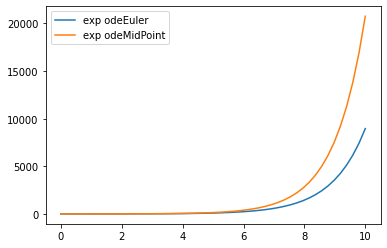

In [4]:
# Przedział czasowy

a = 0
b = 10

# Liczba kroków
n = 50

# Tablica kroków czasowych t:
t = np.linspace(a, b, n)

# Wartość w punkcie początkowym:
y0 = 1

#Rozwiązanie dla Eulera
sol = odeEuler(f, y0, t)

# Rozwiązanie dla MidPoint
sol2 = odeMidPoint(f, y0, t)

# Uzyskane rozwiązanie dla Eulera
plt.plot(t , sol, label = 'exp odeEuler')

# Uzyskane rozwiązanie dla MidPoint
plt.plot(t , sol2, label = 'exp odeMidPoint')

plt.legend()
plt.show()

 # **Zadanie domowe** 

 Rozwiąż metodami Eulera i MidPoint następujące równanie różniczkowe:
 
  $y'(t) = y^2(t)$, 
  
  $y(0) = -1$.
  
Uzyskane rozwiązanie porównaj z rozwiązaniem analitycznym $y(t) = \frac{-1}{t+1}$.

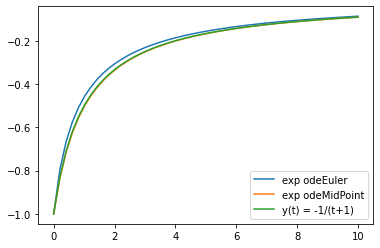

In [6]:
# Przedział czasowy

a = 0
b = 10

# Liczba kroków
n = 50

# Tablica kroków czasowych t:
t = np.linspace(a, b, n)

# Wartość w punkcie początkowym:
y0 = -1

# Definicja funkcji:
def f2(y,t):
  return y**2

# Rozwiązanie analityczne
def f3(t):
  y = -1/(t + 1)
  return y

#Rozwiązanie dla Eulera
solEuler = odeEuler(f2, y0, t)

# Rozwiązanie dla MidPoint
solMidPoint = odeMidPoint(f2, y0, t)

# Uzyskane rozwiązanie dla Eulera
plt.plot(t , solEuler, label = 'exp odeEuler')

# Uzyskane rozwiązanie dla MidPoint
plt.plot(t , solMidPoint, label = 'exp odeMidPoint')

# Rozwiązanie analityczne do porównania
plt.plot(t , f3(t), label = 'y(t) = -1/(t+1)')

plt.legend()
plt.show()